In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSV_AI_Sprint03.csv")

In [ ]:
df.head()

,Marca,Modelo,Problema,Solução
0,Toyota,Corolla,Falha no sistema de freios,Substituição do sistema de freios
1,Ford,F-150,Superaquecimento do motor,Troca da válvula termostática
2,Honda,Civic,Desgaste prematuro dos pneus,Ajuste no alinhamento e balanceamento
3,Chevrolet,Silverado,Vazamento de óleo,Troca da junta do cárter
4,Nissan,Altima,Problemas no câmbio automático,Troca do óleo da transmissão


<Figure size 1200x600 with 0 Axes>

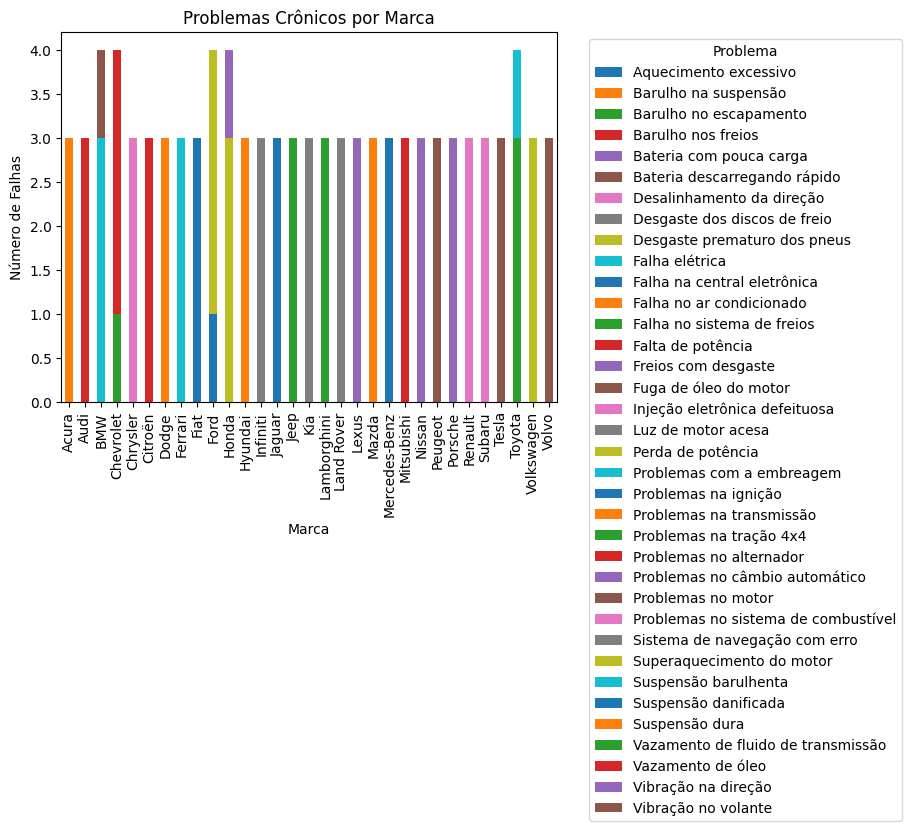

In [ ]:
plt.figure(figsize=(12, 6))
df_problema_marca = df.groupby(['Marca', 'Problema'])['Problema'].count().unstack().fillna(0)
df_problema_marca.plot(kind='bar', stacked=True)
plt.title('Problemas Crônicos por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de Falhas')
plt.xticks(rotation=90)
plt.legend(title='Problema', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-35-8108d83fcf38>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


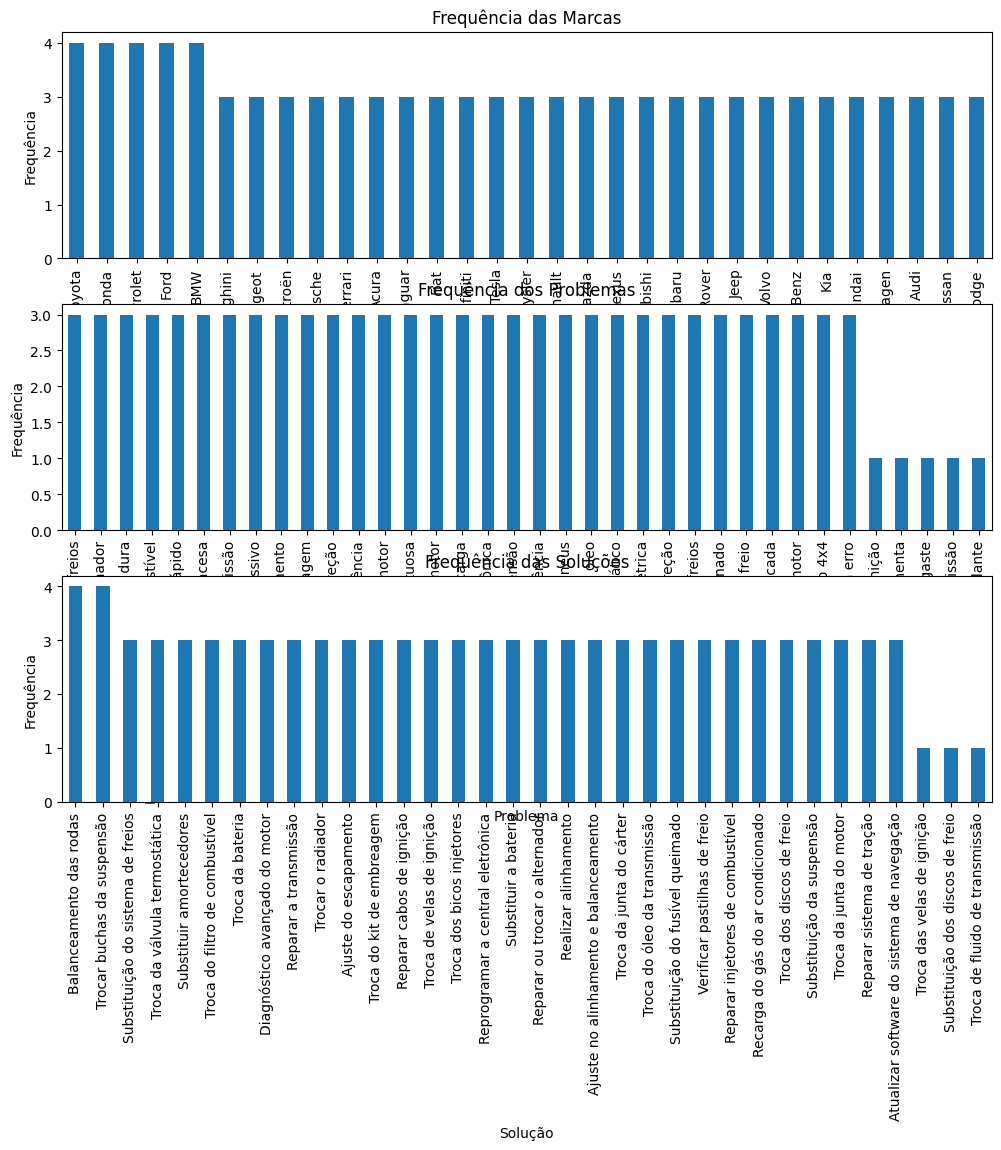

In [35]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
df['Marca'].value_counts().plot(kind='bar')
plt.title('Frequência das Marcas')
plt.xlabel('Marca')
plt.ylabel('Frequência')

plt.subplot(3, 1, 2)
df['Problema'].value_counts().plot(kind='bar')
plt.title('Frequência dos Problemas')
plt.xlabel('Problema')
plt.ylabel('Frequência')

plt.subplot(3, 1, 3)
df['Solução'].value_counts().plot(kind='bar')
plt.title('Frequência das Soluções')
plt.xlabel('Solução')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

,0
Marca,0
Modelo,0
Problema,0
Solução,0


In [ ]:
df.dtypes

,0
Marca,object
Modelo,object
Problema,object
Solução,object


In [ ]:
X = df.drop('Solução', axis=1)
y = df['Solução']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Marca', 'Modelo',
                                                   'Problema'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

                                            precision    recall  f1-score   support

     Ajuste no alinhamento e balanceamento       1.00      1.00      1.00         1
Atualizar software do sistema de navegação       1.00      1.00      1.00         2
                   Balanceamento das rodas       0.20      1.00      0.33         1
                     Reparar a transmissão       1.00      1.00      1.00         1
                  Reparar cabos de ignição       1.00      1.00      1.00         1
            Reparar ou trocar o alternador       1.00      1.00      1.00         1
                 Reparar sistema de tração       1.00      1.00      1.00         1
          Reprogramar a central eletrônica       1.00      1.00      1.00         1
                 Substituição da suspensão       1.00      1.00      1.00         1
         Substituição do sistema de freios       0.00      0.00      0.00         3
                          Troca da bateria       1.00      1.00      1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import files

joblib.dump(pipeline, 'modelo_classificacao.pkl')

files.download('modelo_classificacao.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>